____
__Universidad de San Andrés__<br/>
__Machine Learning__<br/>
__Trabajo Práctico 3: Redes Neuronales__<br/>
__Federico Gutman__
____

### Análisis y Preprocesamiento de Datos

#### Importamos las librerias necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import src.data_splitting as ds
import src.preprocessing as pr
import src.metrics as metrics
import seaborn as sns
import pandas as pd
from src.models import NeuralNetwork

In [2]:
# NOTAS

# VER BACKPROP
# HACER CROSS-VAL
# PULIR CODIGO, NOTEBOOK Y HACER INFORME [EL FINDE VA A HABER CONSULTAS]

In [3]:
X_images = np.load("data/X_images.npy")
y_images = np.load("data/y_images.npy")

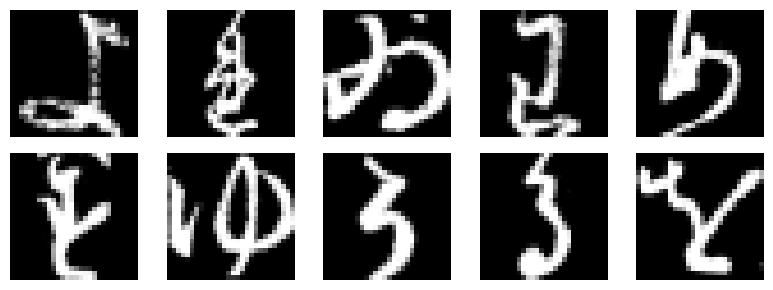

Number of images: 5000


In [4]:
nrows = 2
ncolumns = 5

fig, ax = plt.subplots(nrows, ncolumns, figsize=(8, 3))
for i in range(nrows):
    for k in range(ncolumns):
        ax[i, k].imshow(X_images[np.random.randint(0, len(X_images))].reshape(28, 28), cmap='grey')
        ax[i, k].axis('off')
plt.tight_layout()
plt.show()

print(f'Number of images: {len(X_images)}')


#### Dividimos el conjunto de datos en tres subconjuntos: Train, Validation y Test.

In [5]:
X_dev, X_test, y_dev, y_test = ds.dev_test_split(X_images, y_images)

X_dev, X_test = pr.normalize(X_dev), pr.normalize(X_test)
y_dev, y_test = pr.one_hot_encoding(y_dev), pr.one_hot_encoding(y_test)

X_train, X_valid, y_train, y_valid = ds.train_valid_split(X_dev, y_dev)

#### Entrenamos la red neuronal

In [6]:
m0 = NeuralNetwork(X_train, y_train, [784, 100, 80, 49])
m0.train(X_valid, y_valid, epochs=400, lr=0.1)

Epoch 10/400 - Train Loss: 3.8544 - Val Loss: 3.8584 - Val Acc: 0.0537 - LR: 0.100000
Epoch 20/400 - Train Loss: 3.7826 - Val Loss: 3.7973 - Val Acc: 0.0700 - LR: 0.100000
Epoch 30/400 - Train Loss: 3.7023 - Val Loss: 3.7254 - Val Acc: 0.0912 - LR: 0.100000
Epoch 40/400 - Train Loss: 3.6009 - Val Loss: 3.6336 - Val Acc: 0.1200 - LR: 0.100000
Epoch 50/400 - Train Loss: 3.4745 - Val Loss: 3.5187 - Val Acc: 0.1512 - LR: 0.100000
Epoch 60/400 - Train Loss: 3.3227 - Val Loss: 3.3833 - Val Acc: 0.2087 - LR: 0.100000
Epoch 70/400 - Train Loss: 3.1514 - Val Loss: 3.2321 - Val Acc: 0.2637 - LR: 0.100000
Epoch 80/400 - Train Loss: 2.9683 - Val Loss: 3.0713 - Val Acc: 0.3287 - LR: 0.100000
Epoch 90/400 - Train Loss: 2.7857 - Val Loss: 2.9124 - Val Acc: 0.3588 - LR: 0.100000
Epoch 100/400 - Train Loss: 2.6150 - Val Loss: 2.7649 - Val Acc: 0.3875 - LR: 0.100000
Epoch 110/400 - Train Loss: 2.4605 - Val Loss: 2.6337 - Val Acc: 0.4138 - LR: 0.100000
Epoch 120/400 - Train Loss: 2.3229 - Val Loss: 2.518

Train Accuracy: 0.7506, Validation Accuracy: 0.5800


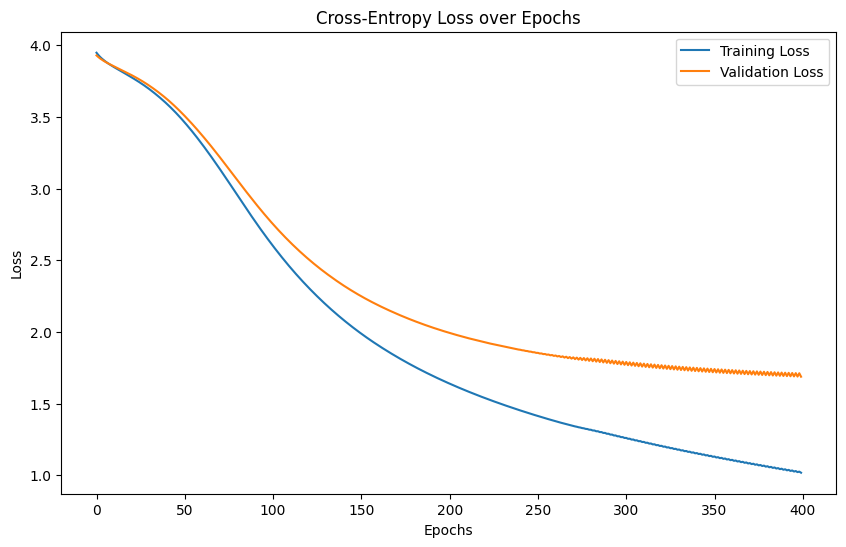

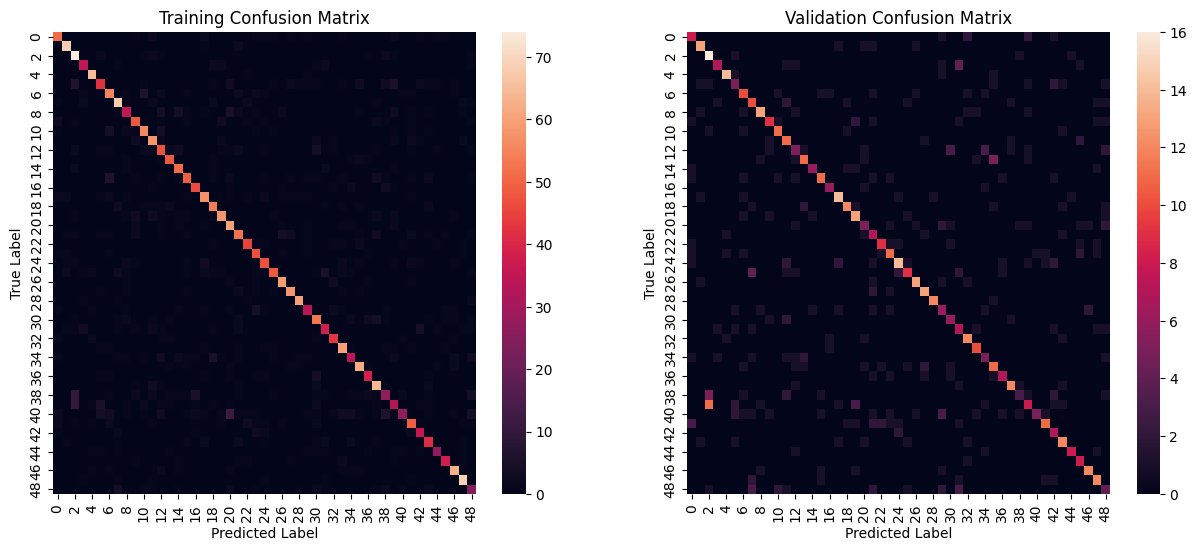

In [7]:
m0.accuracy(X_train, y_train, X_valid, y_valid)
m0.plot_loss()
m0.plot_confusion_matrix(X_train, y_train, X_valid, y_valid)


# FALTA LOSS Y MATRIZ DE CONFUSION
# HACER UNA FUNCION QUE ME IMPRIMA TODO

### Mejoras al algoritmo de entrenamiento

#### Learning Rate scheduling

##### LR Scheduling Lineal

Epoch 10/400 - Train Loss: 3.8550 - Val Loss: 3.8591 - Val Acc: 0.0537 - LR: 0.097750
Epoch 20/400 - Train Loss: 3.7857 - Val Loss: 3.8003 - Val Acc: 0.0700 - LR: 0.095250
Epoch 30/400 - Train Loss: 3.7112 - Val Loss: 3.7340 - Val Acc: 0.0887 - LR: 0.092750
Epoch 40/400 - Train Loss: 3.6212 - Val Loss: 3.6530 - Val Acc: 0.1163 - LR: 0.090250
Epoch 50/400 - Train Loss: 3.5142 - Val Loss: 3.5558 - Val Acc: 0.1412 - LR: 0.087750
Epoch 60/400 - Train Loss: 3.3898 - Val Loss: 3.4449 - Val Acc: 0.1800 - LR: 0.085250
Epoch 70/400 - Train Loss: 3.2529 - Val Loss: 3.3243 - Val Acc: 0.2325 - LR: 0.082750
Epoch 80/400 - Train Loss: 3.1089 - Val Loss: 3.1977 - Val Acc: 0.2800 - LR: 0.080250
Epoch 90/400 - Train Loss: 2.9632 - Val Loss: 3.0705 - Val Acc: 0.3287 - LR: 0.077750
Epoch 100/400 - Train Loss: 2.8225 - Val Loss: 2.9484 - Val Acc: 0.3538 - LR: 0.075250
Epoch 110/400 - Train Loss: 2.6923 - Val Loss: 2.8356 - Val Acc: 0.3762 - LR: 0.072750
Epoch 120/400 - Train Loss: 2.5744 - Val Loss: 2.734

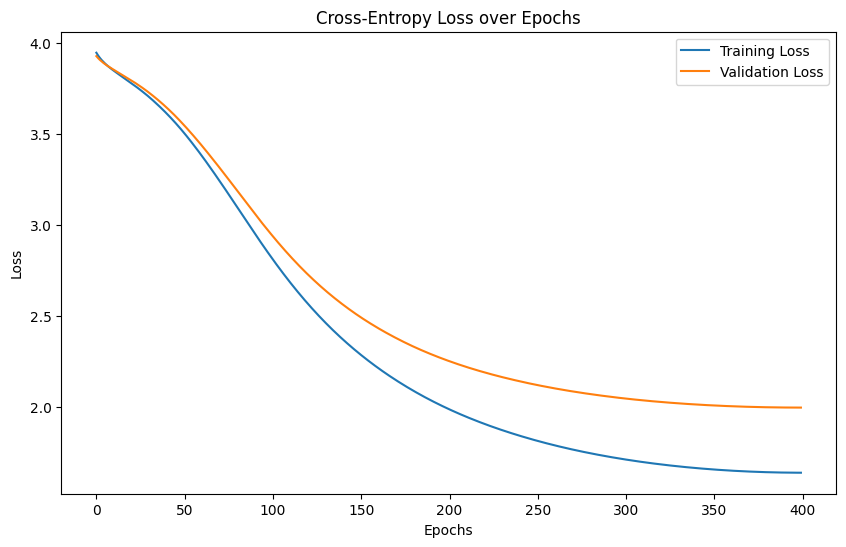

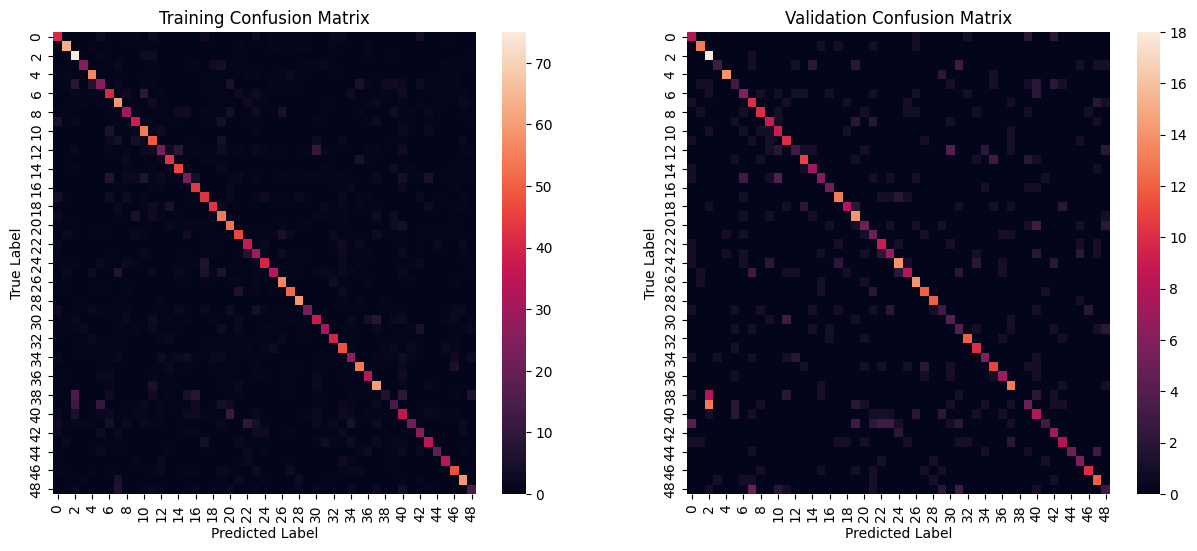

In [9]:
net1 = NeuralNetwork(X_train, y_train, [784, 100, 80, 49])
net1.train(X_valid, y_valid, epochs=400, lr=0.1, scheduling_type='Linear')

net1.accuracy(X_train, y_train, X_valid, y_valid)
net1.plot_loss()
net1.plot_confusion_matrix(X_train, y_train, X_valid, y_valid)

# ME DAN MISMA ACCURACY QUE M0 PERO EN MENOS EPOCAS

##### LR Scheduling Exponencial

Epoch 10/400 - Train Loss: 3.8092 - Val Loss: 3.8181 - Val Acc: 0.0650 - LR: 0.138507
Epoch 20/400 - Train Loss: 3.7215 - Val Loss: 3.7435 - Val Acc: 0.0813 - LR: 0.092084
Epoch 30/400 - Train Loss: 3.6493 - Val Loss: 3.6811 - Val Acc: 0.1062 - LR: 0.061220
Epoch 40/400 - Train Loss: 3.5938 - Val Loss: 3.6333 - Val Acc: 0.1212 - LR: 0.040701
Epoch 50/400 - Train Loss: 3.5531 - Val Loss: 3.5982 - Val Acc: 0.1350 - LR: 0.027060
Epoch 60/400 - Train Loss: 3.5242 - Val Loss: 3.5732 - Val Acc: 0.1400 - LR: 0.017990
Epoch 70/400 - Train Loss: 3.5042 - Val Loss: 3.5560 - Val Acc: 0.1412 - LR: 0.011960
Epoch 80/400 - Train Loss: 3.4905 - Val Loss: 3.5444 - Val Acc: 0.1437 - LR: 0.007952
Epoch 90/400 - Train Loss: 3.4813 - Val Loss: 3.5365 - Val Acc: 0.1475 - LR: 0.005287
Epoch 100/400 - Train Loss: 3.4751 - Val Loss: 3.5313 - Val Acc: 0.1487 - LR: 0.003515
Epoch 110/400 - Train Loss: 3.4709 - Val Loss: 3.5277 - Val Acc: 0.1500 - LR: 0.002337
Epoch 120/400 - Train Loss: 3.4681 - Val Loss: 3.525

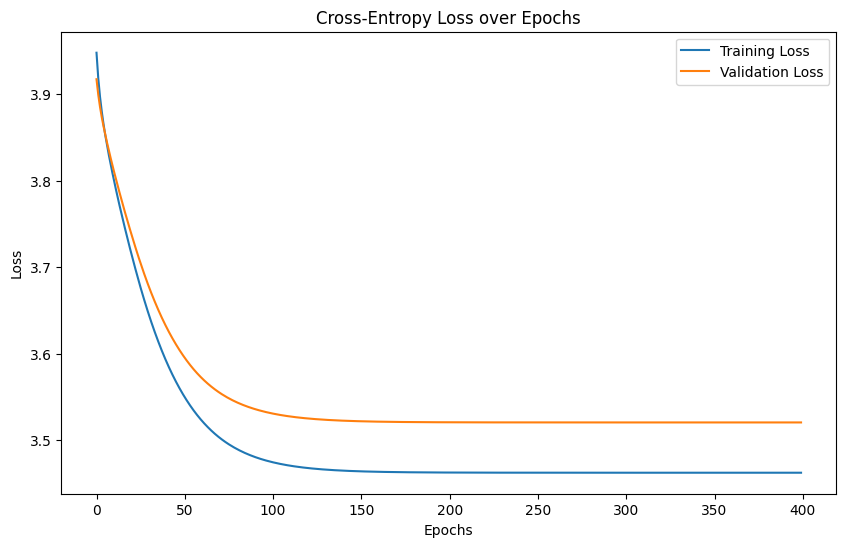

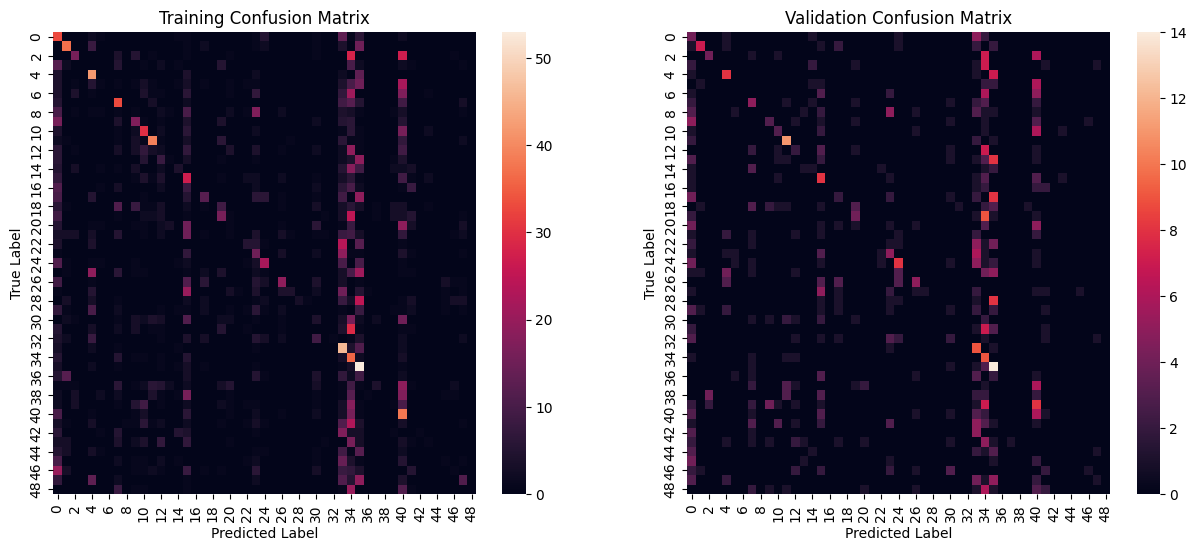

In [10]:
net2 = NeuralNetwork(X_train, y_train, [784, 100, 80, 49])
net2.train(X_valid, y_valid, epochs=400, lr=0.2, scheduling_type='Exp')
# Con un lr mas alto (0.2 por ejemplo) oscilan las curvas de loss (preguntar) esto en teoria no deberia pasar ya que el lr va bajando en cada iteracion

net2.accuracy(X_train, y_train, X_valid, y_valid)
net2.plot_loss()
net2.plot_confusion_matrix(X_train, y_train, X_valid, y_valid)

#### Mini-batch stochastic gradient descent

Epoch 10/40 - Train Loss: 1.1226 - Val Loss: 1.7043 - Val Acc: 0.5500 - LR: 0.100000
Epoch 20/40 - Train Loss: 0.4593 - Val Loss: 1.7125 - Val Acc: 0.5813 - LR: 0.100000
Epoch 30/40 - Train Loss: 0.1498 - Val Loss: 1.7614 - Val Acc: 0.6038 - LR: 0.100000
Epoch 40/40 - Train Loss: 0.0562 - Val Loss: 1.9141 - Val Acc: 0.6275 - LR: 0.100000
Train Accuracy: 0.9991, Validation Accuracy: 0.6275


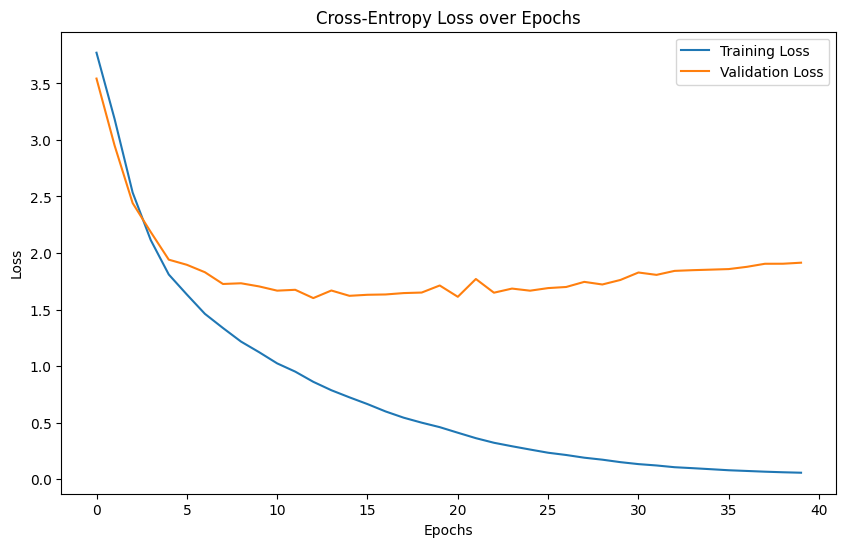

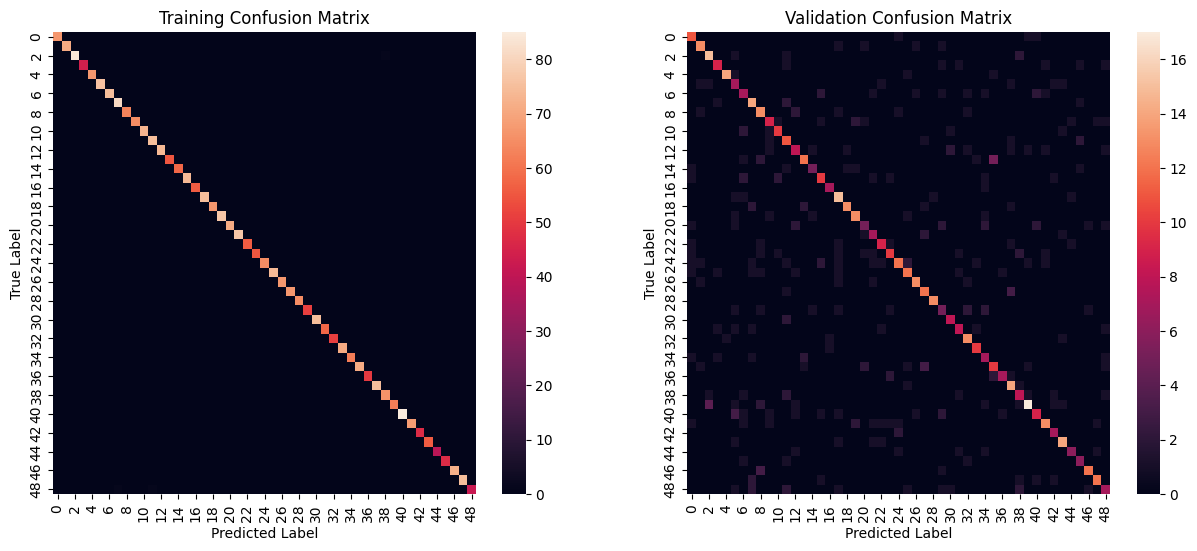

In [11]:
net3 = NeuralNetwork(X_train, y_train, [784, 100, 80, 49])
net3.train(X_valid, y_valid, epochs=40, lr=0.1, batch_size=64) # OPTE POR USAR LR 1

net3.accuracy(X_train, y_train, X_valid, y_valid)
net3.plot_loss()
net3.plot_confusion_matrix(X_train, y_train, X_valid, y_valid) # PREGUNAR QUE ME IMPORTA LA LOSS DE TRAIN

#### ADAM

Epoch 10/40 - Train Loss: 3.9480 - Val Loss: 3.9424 - Val Acc: 0.0262 - LR: 0.100000
Epoch 20/40 - Train Loss: 3.9480 - Val Loss: 3.9424 - Val Acc: 0.0262 - LR: 0.100000
Epoch 30/40 - Train Loss: 3.9480 - Val Loss: 3.9424 - Val Acc: 0.0262 - LR: 0.100000
Epoch 40/40 - Train Loss: 3.9480 - Val Loss: 3.9424 - Val Acc: 0.0262 - LR: 0.100000
Train Accuracy: 0.0234, Validation Accuracy: 0.0262


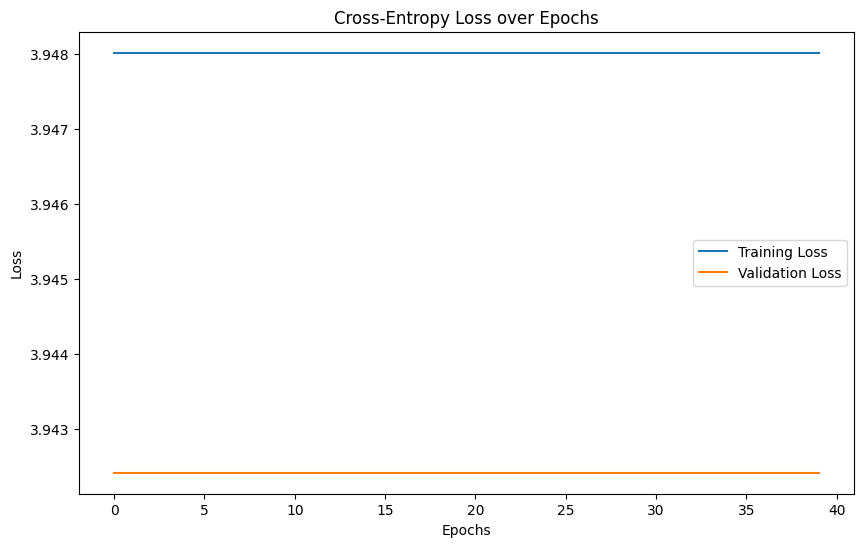

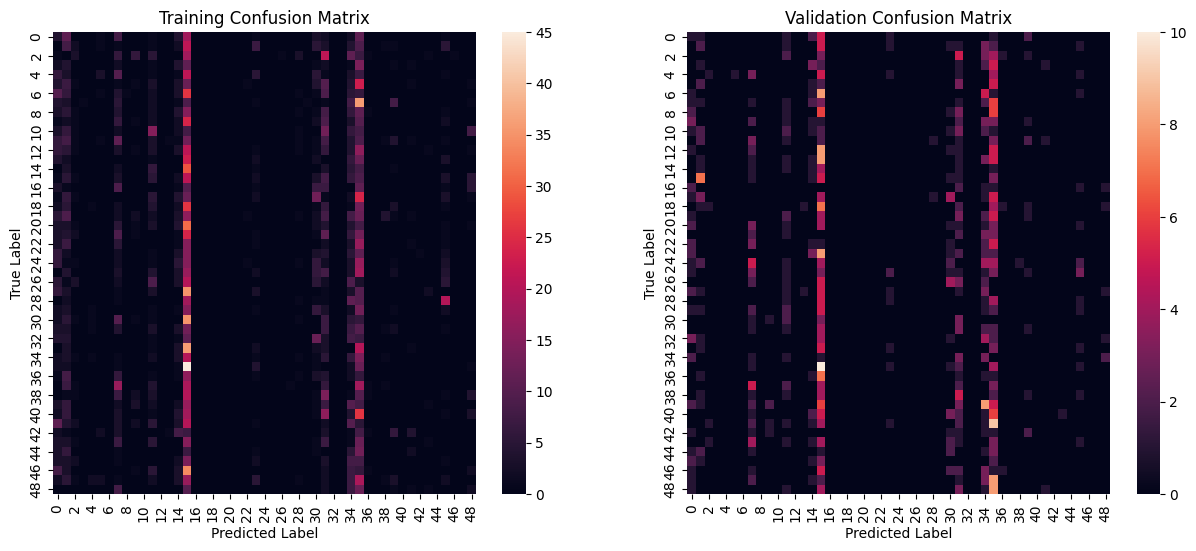

In [12]:
net4 = NeuralNetwork(X_train, y_train, [784, 100, 80, 49])
net4.train(X_valid, y_valid, epochs=40, lr=0.1, optimizer='ADAM')

net4.accuracy(X_train, y_train, X_valid, y_valid)
net4.plot_loss()
net4.plot_confusion_matrix(X_train, y_train, X_valid, y_valid) # PREGUNTAR QUE ME IMPORTA LA LOSS DE TRAIN

#### Regularización L2

#### Early stopping

Epoch 10/600 - Train Loss: 3.8544 - Val Loss: 3.8584 - Val Acc: 0.0537 - LR: 0.100000
Epoch 20/600 - Train Loss: 3.7826 - Val Loss: 3.7973 - Val Acc: 0.0700 - LR: 0.100000
Epoch 30/600 - Train Loss: 3.7023 - Val Loss: 3.7254 - Val Acc: 0.0912 - LR: 0.100000
Epoch 40/600 - Train Loss: 3.6009 - Val Loss: 3.6336 - Val Acc: 0.1200 - LR: 0.100000
Epoch 50/600 - Train Loss: 3.4745 - Val Loss: 3.5187 - Val Acc: 0.1512 - LR: 0.100000
Epoch 60/600 - Train Loss: 3.3227 - Val Loss: 3.3833 - Val Acc: 0.2087 - LR: 0.100000
Epoch 70/600 - Train Loss: 3.1514 - Val Loss: 3.2321 - Val Acc: 0.2637 - LR: 0.100000
Epoch 80/600 - Train Loss: 2.9683 - Val Loss: 3.0713 - Val Acc: 0.3287 - LR: 0.100000
Epoch 90/600 - Train Loss: 2.7857 - Val Loss: 2.9124 - Val Acc: 0.3588 - LR: 0.100000
Epoch 100/600 - Train Loss: 2.6150 - Val Loss: 2.7649 - Val Acc: 0.3875 - LR: 0.100000
Epoch 110/600 - Train Loss: 2.4605 - Val Loss: 2.6337 - Val Acc: 0.4138 - LR: 0.100000
Epoch 120/600 - Train Loss: 2.3229 - Val Loss: 2.518

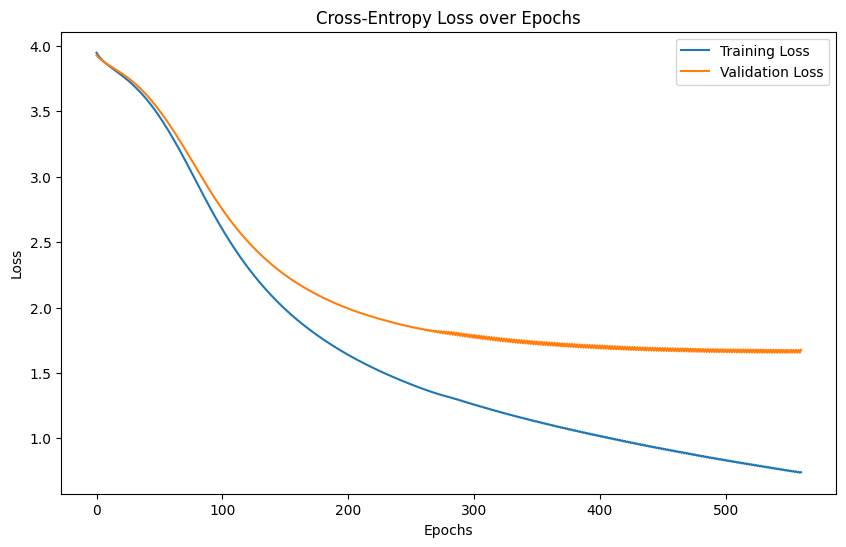

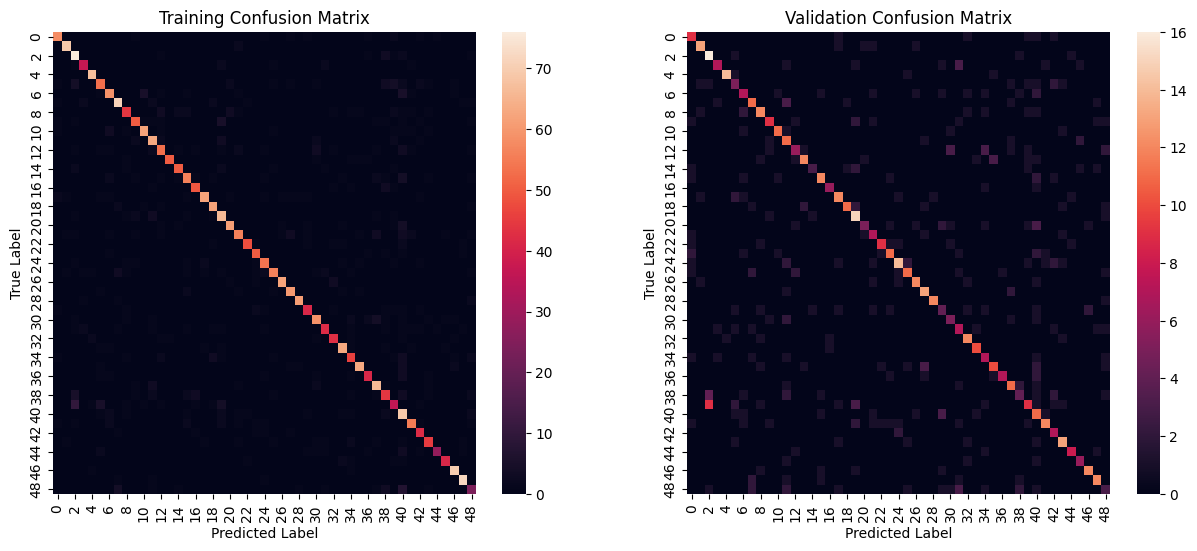

In [13]:
net5 = NeuralNetwork(X_train, y_train, [784, 100, 80, 49])
net5.train(X_valid, y_valid, epochs=600, lr=0.1, optimizer='gradient_descent', early_stopping=True) # XQ EN EARLY STOPPING COMPARO CON LA LOSS MAS BAJA Y NO CON LA ULTIMA?

net5.accuracy(X_train, y_train, X_valid, y_valid)
net5.plot_loss()
net5.plot_confusion_matrix(X_train, y_train, X_valid, y_valid)

#### Dropout

#### Batch normalization

### Probamos distintas arquitecturas
[ver de buscar de maenra greedy los mejores hiperparams pero justificar cuales considero mas importantes que otros]